1) (a) Write a function to calculate the potential energy surface $U(r)$ for a diatomic molecule with a harmonic bond potential,

\begin{equation}
U_\mathrm{harmonic} = k(r − r_{eq})^2 ,
\end{equation}

where $k$ is the bond force constant and $r_\mathrm{eq}$ is the equilibrium bond length. Your function should take three arguments as input ($r$, $r_\mathrm{eq}$ , and $k$) and return the potential energy for that value of $r$.

In [1]:
def U_harmonic(r, req, k):
    """Compute the potential energy at point r for a harmonic oscillator
    Args:
        r (float): The bond length.
        req (float): The equilibrium bond length.
        k (float): The bond force constant.
        
    Returns:
        float
        
    """
    return k*(r-req)**2

(b) Plot this function for H$_2$($r_\mathrm{eq}= 0.74$, $k = 575$ N m$^{-1}$) for $0.38 \leq r \leq 1.1$

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [3]:
# create a numpy array containing a series of r values to use for plotting
r_values = np.linspace(0.38, 1.1)
r_values

array([0.38      , 0.39469388, 0.40938776, 0.42408163, 0.43877551,
       0.45346939, 0.46816327, 0.48285714, 0.49755102, 0.5122449 ,
       0.52693878, 0.54163265, 0.55632653, 0.57102041, 0.58571429,
       0.60040816, 0.61510204, 0.62979592, 0.6444898 , 0.65918367,
       0.67387755, 0.68857143, 0.70326531, 0.71795918, 0.73265306,
       0.74734694, 0.76204082, 0.77673469, 0.79142857, 0.80612245,
       0.82081633, 0.8355102 , 0.85020408, 0.86489796, 0.87959184,
       0.89428571, 0.90897959, 0.92367347, 0.93836735, 0.95306122,
       0.9677551 , 0.98244898, 0.99714286, 1.01183673, 1.02653061,
       1.04122449, 1.05591837, 1.07061224, 1.08530612, 1.1       ])

In [4]:
# Here we explicitly store the calculated U values in an intermediate variable
U_values = U_harmonic(r_values, req=0.74, k=575.0)
U_values
# Notice that we have passed in a numpy array as the first argument to our function,
# even though our docstring specified this argument should be a float.
# Python is dynamically typed, so we are free to pass in any variable type we like
# (but there is no guarantee that it will do what we think)

array([7.45200000e+01, 6.85608830e+01, 6.28500625e+01, 5.73875385e+01,
       5.21733111e+01, 4.72073803e+01, 4.24897459e+01, 3.80204082e+01,
       3.37993669e+01, 2.98266222e+01, 2.61021741e+01, 2.26260225e+01,
       1.93981674e+01, 1.64186089e+01, 1.36873469e+01, 1.12043815e+01,
       8.96971262e+00, 6.98334027e+00, 5.24526447e+00, 3.75548521e+00,
       2.51400250e+00, 1.52081633e+00, 7.75926697e-01, 2.79333611e-01,
       3.10370679e-02, 3.10370679e-02, 2.79333611e-01, 7.75926697e-01,
       1.52081633e+00, 2.51400250e+00, 3.75548521e+00, 5.24526447e+00,
       6.98334027e+00, 8.96971262e+00, 1.12043815e+01, 1.36873469e+01,
       1.64186089e+01, 1.93981674e+01, 2.26260225e+01, 2.61021741e+01,
       2.98266222e+01, 3.37993669e+01, 3.80204082e+01, 4.24897459e+01,
       4.72073803e+01, 5.21733111e+01, 5.73875385e+01, 6.28500625e+01,
       6.85608830e+01, 7.45200000e+01])

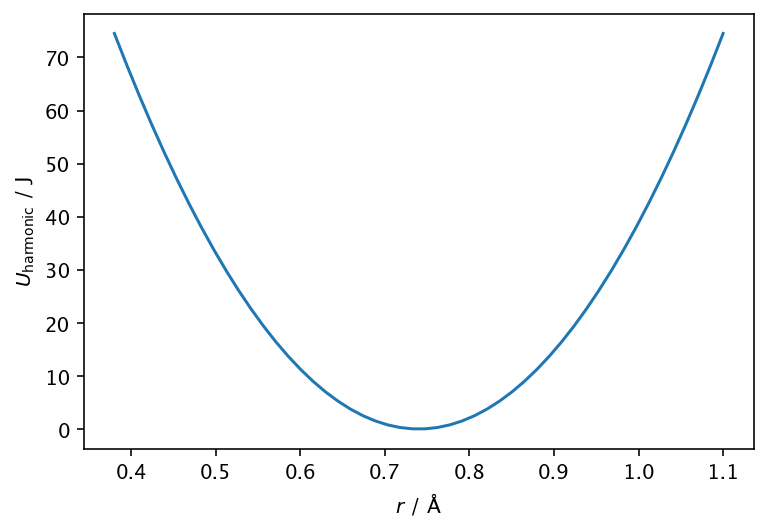

In [5]:
plt.plot(r_values, U_values)
plt.xlabel('$r$ / Å')
plt.ylabel('$U_\mathrm{harmonic}$ / J')
plt.show()

(c) Write a function to calculate the first derivative of this potential energy function,

\begin{equation}
U_\mathrm{harmonic}^\prime = 2k(r − r_\mathrm{eq}).
\end{equation}

Your function should take three arguments as input ($r$, $r_\mathrm{eq}$, and $k$) and return $U^\prime(r)$.

In [6]:
def U_harmonic_prime(r, req, k):
    """Compute the first derivative of the potential energy at point r for a harmonic oscillator
    Args:
        r (float): The bond length.
        req (float): The equilibrium bond length.
        k (float): The bond force constant.
        
    Returns:
        float
        
    """
    return 2*k*(r-req)

(d) Plot this function for H$_2$($r_\mathrm{eq}= 0.74$, $k = 575$ N m$^{-1}$) for $0.38 \leq r \leq 1.1$

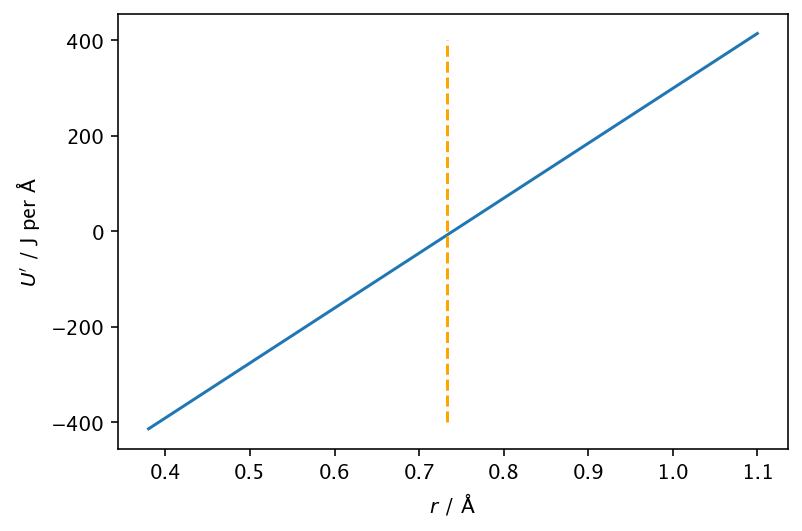

In [7]:
U_prime_values = U_harmonic_prime(r_values, req=0.74, k=575.0)
plt.plot(r_values, U_prime_values)
plt.xlabel('$r$ / Å')
plt.ylabel('$U^\prime$ / J per Å')

# This gives me the array index with the smallest absolute value.
index = np.argmin(np.abs(U_prime_values))
# Draw a vertical line where U_prime = 0.0
plt.vlines(r_values[index], -400, +400, linestyles='--', color="orange") 
plt.show()

(e) Starting at $r_0= 1.0$, perform one step of a gradient descent geometry optimisation (with $\alpha = 0.001$) to obtain a predicted value $r_1$.

\begin{equation}
r_1 = r_0 − \alpha U_\mathrm{harmonic}^\prime(r_0).
\end{equation}

In [8]:
r0 = 1.0
alpha = 0.001

In [9]:
r1 = r0 - alpha * U_harmonic_prime(r0, req=0.74, k=575.0)
print(r1)

0.7010000000000001


(f) Perform a second step of your iterative procedure to calculate the value of $r_2$, and confirm that it is closer to the true equilibrium bond length than $r_1$.

\begin{equation}
r_2 = r_1 − \alpha U_\mathrm{harmonic}^\prime(r_1).
\end{equation}

In [10]:
r2 = r1 - alpha * U_harmonic_prime(r1, req=0.74, k=575.0)
print(r2)

0.74585


Repeat this iterative procedure up to $r_5$. Plot the values $r_0 \ldots r_5$ to visualise the convergence behaviour.

In [11]:
r3 = r2 - alpha * U_harmonic_prime(r2, req=0.74, k=575.0)
print(r3)

0.7391225


In [12]:
r4 = r3 - alpha * U_harmonic_prime(r3, req=0.74, k=575.0)
print(r4)

0.740131625


In [13]:
r5 = r4 - alpha * U_harmonic_prime(r4, req=0.74, k=575.0)
print(r5)

0.73998025625


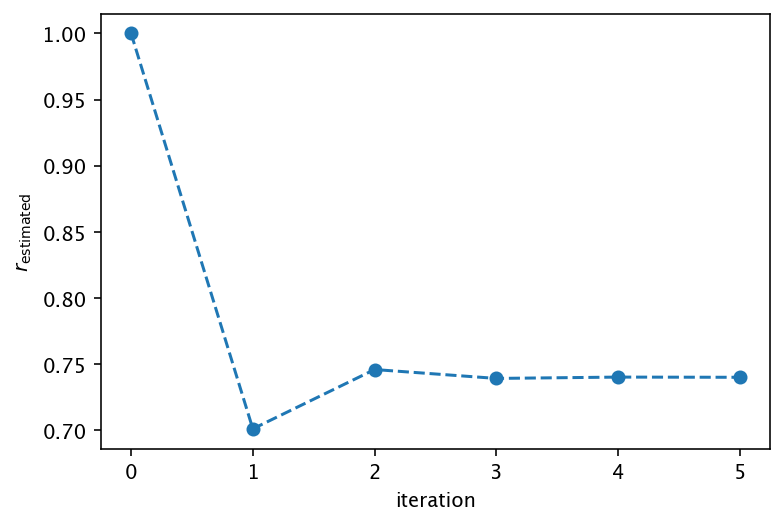

In [14]:
plt.plot([r0, r1, r2, r3, r4, r5], 'o--')
plt.xlabel('iteration')
plt.ylabel('$r_\mathrm{estimated}$')
plt.show()

Rewrite your iterative procedure as a loop over 5 steps (remember to update $r_\mathrm{n}$ each iteration with the value $r_\mathrm{n+1}$ from the previous iteration). Store your value for $r_\mathrm{n}$ at each step. Check that you get the same behaviour as when you calculated each iteration manually.

In [15]:
r0 = 1.0
alpha = 0.001

rn = r0
r_per_step = [r0]
for i in range(5):
    rn_plus_1 = rn - alpha * U_harmonic_prime(rn, req=0.74, k=575.0)
    rn = rn_plus_1
    r_per_step.append(rn)

In [16]:
print(r_per_step)

[1.0, 0.7010000000000001, 0.74585, 0.7391225, 0.740131625, 0.73998025625]


Rewrite your gradient descent optimisation code to run until you reach a convergence threshold of $U_\mathrm{harmonic}^\prime < \left| 0.01 \right|$ .

In [17]:
# gradient descent
r0 = 1.0
alpha = 0.001

rn = r0
r_per_step = [r0]
convergence = 0.0001
gradient = U_harmonic_prime(rn, req=0.74, k=575.0)
while abs(gradient) > convergence:
    rn_plus_1 = rn - alpha * gradient
    rn = rn_plus_1
    r_per_step.append(rn)
    gradient = U_harmonic_prime(rn, req=0.74, k=575.0)
    
# Note how we initially calculate gradient *outside* the loop, but still use it in the loop.
# Then we recalculate it for the n+1 position at the *end* of the loop. This value gets used
# for checking convergence, and, if we are not yet converged, for the next prediction step.

r_per_step

[1.0,
 0.7010000000000001,
 0.74585,
 0.7391225,
 0.740131625,
 0.73998025625,
 0.7400029615625,
 0.739999555765625,
 0.7400000666351563]

2) (a) Write a function to calculate the potential energy surface for a pair of “Lennard-Jones” atoms (e.g., two argon atoms):
\begin{equation}
U_\mathrm{LJ} = \frac{A}{r^{12}} - \frac{B}{r^6}.
\end{equation}

In [18]:
def U_LJ(r, A, B):
    """Compute the potential energy at point r for a Lennard-Jones 12-6 potential.
    Args:
        r (float): The bond length.
        A (float): LJ A parameter.
        B (float): LJ B parameter.
        
    Returns:
        float
        
    """
    return A / r**12 - B / r**6

Plot this function for $A = 1 \times 10^{5}$ eV Å$^{12}$ and $B = 40$ eV Å$^6$.

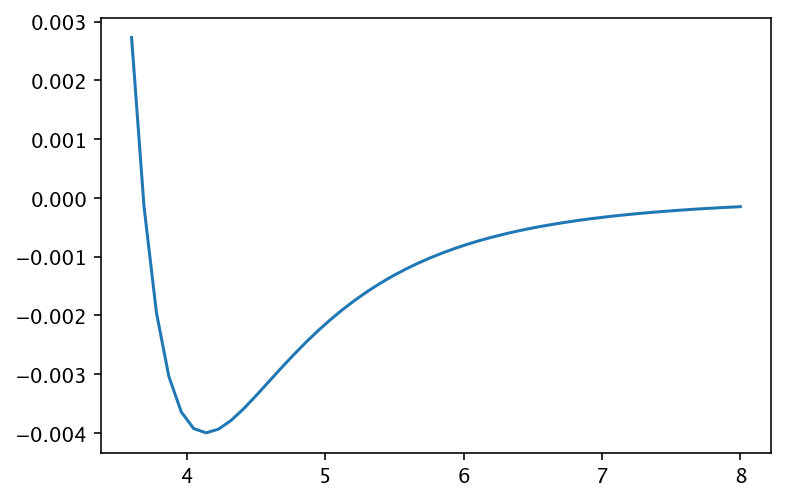

In [19]:
A = 1e5
B = 40

r_values = np.linspace(3.6, 8.0)

plt.plot(r_values, U_LJ(r_values, A=A, B=B))
plt.show()

Write code to find the optimum interatomic separation for a pair of Lennard-Jones atoms (with the same potential parameters as above) using gradient descent. Experiment with different values of $\alpha$ and different starting values for $r$.

You will need the first derivative of $U_\mathrm{LJ}$:
\begin{equation}
U_\mathrm{LJ}^\prime = -12\frac{A}{r^{13}}+6\frac{B}{r^7}.
\end{equation}

In [20]:
def U_LJ_prime(r, A, B):
    """Compute dU/dr at point r for a Lennard-Jones 12-6 potential.
    Args:
        r (float): The bond length.
        A (float): LJ A parameter.
        B (float): LJ B parameter.
        
    Returns:
        float
        
    """
    return -12 * A / r**13 + 6 * B / r**7

In [21]:
# Lennard-Jones gradient descent

# This is a copy of the gradient descent code for the harmonic potential, above,
# with a couple of additions:
# 1. I have added `iterations` and `max_iterations` variables to track the iteration
#    number. This gets incremented by +1 every iteration.
# 2. Each iteration I print the iteration number, current value of r, 
#    and current gradient, so that we can see the optimisation progress.

r0 = 5.0
alpha = 100

rn = r0
r_per_step = [r0]
convergence = 0.0001
gradient = U_LJ_prime(rn, A=A, B=B)
iterations = 0 # I am adding a counter for the number of iterations
max_iterations = 50 # And a maximum number of iterations
while (abs(gradient) > convergence) and (iterations <= max_iterations):
    iterations += 1
    rn_plus_1 = rn - alpha * gradient
    rn = rn_plus_1
    r_per_step.append(rn)
    gradient = U_LJ_prime(rn, A=A, B=B)
    print(f'iteration: {iterations} \t r: {rn: .3f} \t dU/dr: {gradient: .5e}')

iteration: 1 	 r:  4.791 	 dU/dr:  2.42948e-03
iteration: 2 	 r:  4.548 	 dU/dr:  2.59400e-03
iteration: 3 	 r:  4.289 	 dU/dr:  1.76713e-03
iteration: 4 	 r:  4.112 	 dU/dr: -4.13471e-04
iteration: 5 	 r:  4.153 	 dU/dr:  2.92780e-04
iteration: 6 	 r:  4.124 	 dU/dr: -1.91848e-04
iteration: 7 	 r:  4.143 	 dU/dr:  1.33817e-04
iteration: 8 	 r:  4.130 	 dU/dr: -8.99785e-05


In [22]:
# What happens with different r_0 and alpha values?

# ---> The algorithm fails to find the minimum for very small or very large r0 values.
# (why?)

Write code to perform geometry optimisation on your Harmonic potential and your Lennard-Jones potential using the Newton-Raphson method.

The second derivative of $U_\mathrm{harmonic}$ is $2k$

The second derivative of $U_\mathrm{LJ}$ is
\begin{equation}
U_\mathrm{LJ}^{\prime\prime} = 156\frac{A}{r^{14}}-42\frac{B}{r^8}.
\end{equation}

In [23]:
def U_harmonic_prime2(r, req, k):
    """Compute the second derivative of the potential energy at point r
    for a harmonic oscillator
    
    Args:
        r (float): The bond length.
        req (float): The equilibrium bond length.
        k (float): The bond force constant.
        
    Returns:
        float
        
    """
    return 2*k

Show that the Newton-Raphson method finds the optimum bond length for the harmonic potential in one step.

In [24]:
# Harmonic potential Newton-Raphson

# This will always find the exact minimum in one step, because we can completely
# describe a harmonic potential with a second-order Taylor series.

r0 = 1.0

req = 0.74
k = 575.0

rn = r0
r_per_step = [r0]
convergence = 0.0001
gradient = U_harmonic_prime(rn, req=req, k=k)
iterations = 0 # I am adding a counter for the number of iterations
max_iterations = 50 # And a maximum number of iterations
while (abs(gradient) > convergence) and (iterations <= max_iterations):
    curvature = U_harmonic_prime2(rn, req=req, k=k)
    rn_plus_1 = rn - gradient / curvature
    rn = rn_plus_1
    r_per_step.append(rn)
    gradient = U_harmonic_prime(rn, req=req, k=k)
    print(f'iteration: {iterations} \t r: {rn: .3f} \t dU/dr: {gradient: .5e}')

iteration: 0 	 r:  0.740 	 dU/dr:  0.00000e+00


In [25]:
def U_LJ_prime2(r, A, B):
    """Compute d2U/dr2 at point r for a Lennard-Jones 12-6 potential.
    Args:
        r (float): The bond length.
        A (float): LJ A parameter.
        B (float): LJ B parameter.
        
    Returns:
        float
        
    """
    return 156 * A / r**14 - 42 * B / r**8

Investigate how the Newton-Raphson optimisation algorithm performs against the gradient descent method for the Lennard-Jones potential, with starting points of $r = 3.2$ Å, $r = 4.4$ Å , and $r = 6.0$ Å.

In [26]:
# Lennard-Jones Newton-Raphson; r0 = 3.2 Å

r0 = 3.2

rn = r0
r_per_step = [r0]
convergence = 0.0001
gradient = U_LJ_prime(rn, A=A, B=B)
iterations = 0 # I am adding a counter for the number of iterations
max_iterations = 50 # And a maximum number of iterations
while (abs(gradient) > convergence) and (iterations <= max_iterations):
    iterations += 1
    curvature = U_LJ_prime2(rn, A=A, B=B)
    rn_plus_1 = rn - gradient / curvature
    rn = rn_plus_1
    r_per_step.append(rn)
    gradient = U_LJ_prime(rn, A=A, B=B)
    print(f'iteration: {iterations} \t r: {rn: .3f} \t dU/dr: {gradient: .5e}')

iteration: 1 	 r:  3.419 	 dU/dr: -9.38024e-02
iteration: 2 	 r:  3.635 	 dU/dr: -3.34546e-02
iteration: 3 	 r:  3.835 	 dU/dr: -1.12356e-02
iteration: 4 	 r:  3.998 	 dU/dr: -3.28667e-03
iteration: 5 	 r:  4.099 	 dU/dr: -6.73165e-04
iteration: 6 	 r:  4.132 	 dU/dr: -5.28777e-05


In [27]:
# Lennard-Jones Newton-Raphson; r0 = 4.4 Å

r0 = 4.4

rn = r0
r_per_step = [r0]
convergence = 0.0001
gradient = U_LJ_prime(rn, A=A, B=B)
iterations = 0 # I am adding a counter for the number of iterations
max_iterations = 50 # And a maximum number of iterations
while (abs(gradient) > convergence) and (iterations <= max_iterations):
    iterations += 1
    curvature = U_LJ_prime2(rn, A=A, B=B)
    rn_plus_1 = rn - gradient / curvature
    rn = rn_plus_1
    r_per_step.append(rn)
    gradient = U_LJ_prime(rn, A=A, B=B)
    print(f'iteration: {iterations} \t r: {rn: .3f} \t dU/dr: {gradient: .5e}')

iteration: 1 	 r:  3.701 	 dU/dr: -2.38428e-02
iteration: 2 	 r:  3.892 	 dU/dr: -7.75789e-03
iteration: 3 	 r:  4.038 	 dU/dr: -2.09848e-03
iteration: 4 	 r:  4.116 	 dU/dr: -3.47914e-04
iteration: 5 	 r:  4.134 	 dU/dr: -1.58554e-05


In [28]:
# Lennard-Jones Newton-Raphson; r0 = 6.0 Å

# This fails to find the minimum (even if we make the convergence threshold smaller).
# Why?

r0 = 6.0

rn = r0
r_per_step = [r0]
convergence = 0.0001
gradient = U_LJ_prime(rn, A=A, B=B)
iterations = 0 # I am adding a counter for the number of iterations
max_iterations = 50 # And a maximum number of iterations
while (abs(gradient) > convergence) and (iterations <= max_iterations):
    iterations += 1
    curvature = U_LJ_prime2(rn, A=A, B=B)
    rn_plus_1 = rn - gradient / curvature
    rn = rn_plus_1
    r_per_step.append(rn)
    gradient = U_LJ_prime(rn, A=A, B=B)
    print(f'iteration: {iterations} \t r: {rn: .3f} \t dU/dr: {gradient: .5e}')

iteration: 1 	 r:  6.955 	 dU/dr:  2.91289e-04
iteration: 2 	 r:  7.990 	 dU/dr:  1.13224e-04
iteration: 3 	 r:  9.151 	 dU/dr:  4.42818e-05


4. (b) Use `scipy.optimize.minimize()` to perform a geometry optimisation for your Lennard-Jones potential, again with starting values of $r = 3.2$ Å, $r = 4.4$ Å, and $r = 6.0$ Å.

In [29]:
from scipy.optimize import minimize

In [30]:
minimize(fun=U_LJ, x0=3.2, args=(A, B))

      fun: -0.0039999994531182805
 hess_inv: array([[55.20310257]])
      jac: array([-4.29374631e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([4.13493076])

In [31]:
minimize(fun=U_LJ, x0=4.4, args=(A, B))

      fun: -0.003999998697116576
 hess_inv: array([[70.52936233]])
      jac: array([-6.62903767e-06])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 8
   status: 0
  success: True
        x: array([4.13479233])

In [32]:
minimize(fun=U_LJ, x0=6.0, args=(A, B))

# scipy.optimize.minimize uses a more robust (and complicated) numerical algorithm
# than our hand-coded methods above, and still finds the minimum for r0 = 6.0

      fun: -0.00399999994107526
 hess_inv: array([[63.72792934]])
      jac: array([-1.40891643e-06])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 3
     njev: 16
   status: 0
  success: True
        x: array([4.1351019])

(c) Write a function to model the potential energy function

 \begin{equation}
    U = \frac{1}{2}\left\{A_1[1+\cos\theta] + A_2[1+\cos 2\theta] + A_3[1+\cos 3\theta]\right\}.
    \end{equation}
    
This function describes the potential energy of the Cl--C--C--Cl dihedral angle in 1,2-dichloroethane, where $A_1=55.229$ kJ mol$^{-1}$, $A_2 = 3.3472$ kJ mol$^{-1}$, $A_3=-58.576$ kJ mol$^{-1}$, and $\theta$ is the dihedral angle.

In [33]:
def U_dihedral(theta, A1, A2, A3):
    """Calculate the potential energy function of a dihedral bond angle.
    
    Args:
        theta (float): The dihedral angle.
        A1 (float): parameter A1.
        A2 (float): parameter A2.
        A3 (float): parameter A3.
        
    Returns
        float
        
    """
    return 1/2 * (  A1 * (1 + np.cos(theta))    # splitting this bracketed expression
                  + A2 * (1 + np.cos(2*theta))  # over multiple lines makes it 
                  + A3 * (1 + np.cos(3*theta))) # more readable

# Note the use of `np.cos` instead of `math.cos`.
# This allows our function to operate on single values of theta, 
# *and* np.array values of theta.

(d) Plot this function for $-\pi \leq \theta \leq \pi$.

In [34]:
A1 =  55.229
A2 =  3.3472
A3 = -58.576

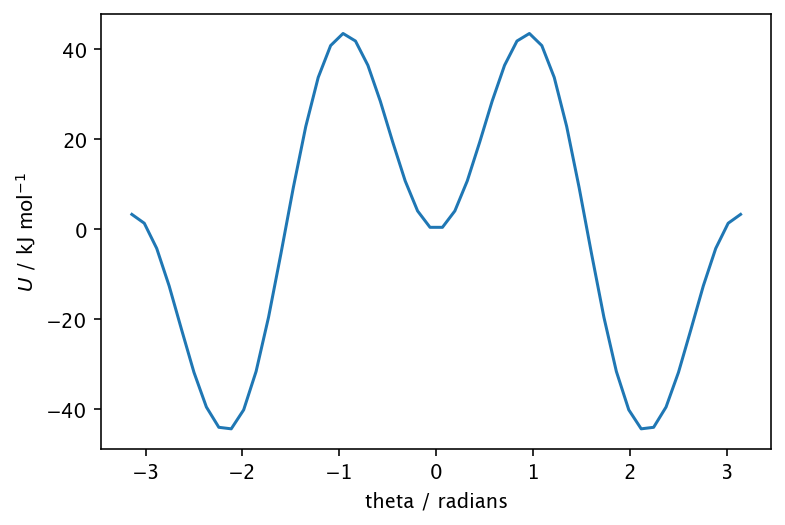

In [35]:
theta = np.linspace(-np.pi, +np.pi)

plt.plot(theta, U_dihedral(theta=theta, A1=A1, A2=A2, A3=A3))
plt.xlabel('theta / radians')
plt.ylabel('$U$ / kJ mol$^{-1}$')
plt.show()

(e) Using `scipy.optimize.minimize()` test different initial values of $x_0$ for $\theta$. Consider why the result is so dependent on the initial guess for this minimisation.

      fun: -44.720865421673125
 hess_inv: array([[0.00363686]])
      jac: array([4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([2.16973602])


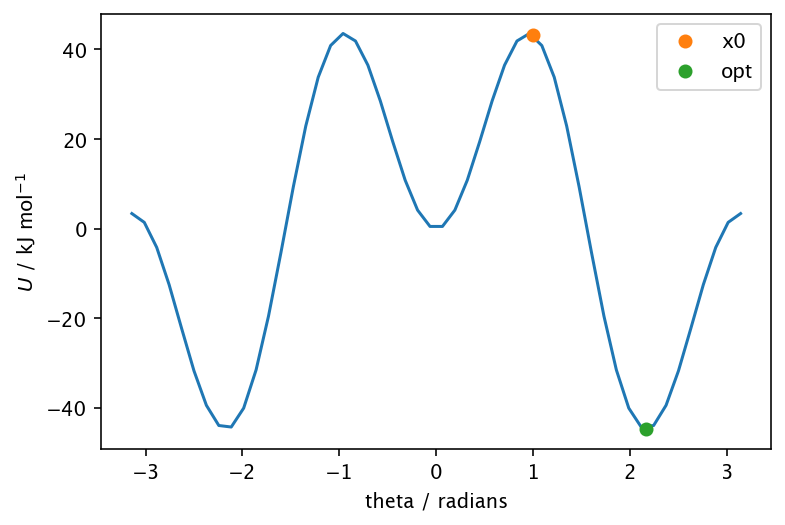

In [36]:
x0 = 1.0 
result = minimize(fun=U_dihedral, x0=x0, args=(A1, A2, A3))
print(result)

plt.plot(theta, U_dihedral(theta=theta, A1=A1, A2=A2, A3=A3))
plt.plot(x0, U_dihedral(theta=x0, A1=A1, A2=A2, A3=A3), 'o', label='x0')
plt.plot(result.x, U_dihedral(theta=result.x, A1=A1, A2=A2, A3=A3), 'o', label='opt')
plt.xlabel('theta / radians')
plt.ylabel('$U$ / kJ mol$^{-1}$')
plt.legend()
plt.show()

      fun: 0.00019999999999953388
 hess_inv: array([[0.00436147]])
      jac: array([9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([-4.64291502e-09])


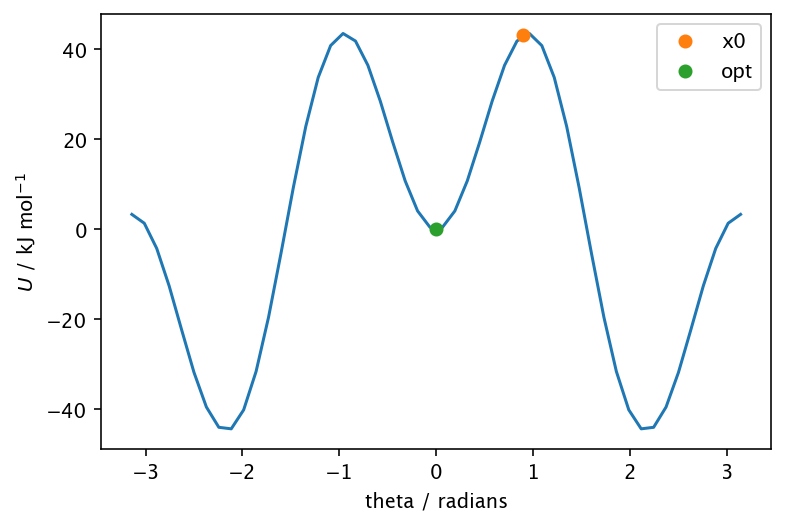

In [37]:
x0 = 0.9 
result = minimize(fun=U_dihedral, x0=x0, args=(A1, A2, A3))
print(result)

plt.plot(theta, U_dihedral(theta=theta, A1=A1, A2=A2, A3=A3))
plt.plot(x0, U_dihedral(theta=x0, A1=A1, A2=A2, A3=A3), 'o', label='x0')
plt.plot(result.x, U_dihedral(theta=result.x, A1=A1, A2=A2, A3=A3), 'o', label='opt')
plt.xlabel('theta / radians')
plt.ylabel('$U$ / kJ mol$^{-1}$')
plt.legend()
plt.show()

      fun: -44.720865421673125
 hess_inv: array([[0.00363826]])
      jac: array([2.86102295e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 10
   status: 0
  success: True
        x: array([-2.16973603])


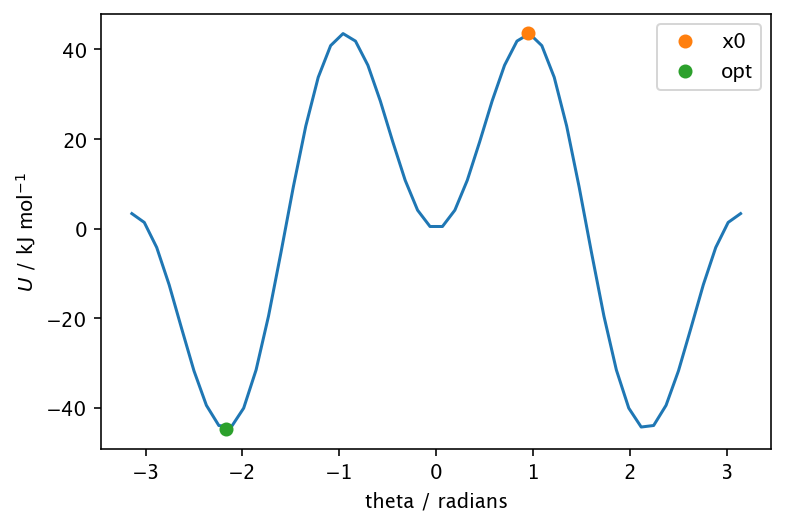

In [38]:
x0 = 0.948
result = minimize(fun=U_dihedral, x0=x0, args=(A1, A2, A3))
print(result)

plt.plot(theta, U_dihedral(theta=theta, A1=A1, A2=A2, A3=A3))
plt.plot(x0, U_dihedral(theta=x0, A1=A1, A2=A2, A3=A3), 'o', label='x0')
plt.plot(result.x, U_dihedral(theta=result.x, A1=A1, A2=A2, A3=A3), 'o', label='opt')
plt.xlabel('theta / radians')
plt.ylabel('$U$ / kJ mol$^{-1}$')
plt.legend()
plt.show()